### Prueba de Selección de la empresa Azzorti para el puesto Prácticante de Ciencia de Datos

Cierta compañía internacional de venta directa tiene un catálogo que tiene
21 días de vida, los primeros tres días se reciben alrededor del 30% (en
promedio) de los pedidos totales que corresponden a los 10 grupos de venta.
Con dichos pedidos se busca pronosticar los pedidos totales al cierre de los
21 días.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [132]:
%%time
datos = pd.read_excel("datos/Datos_201901_202009.xlsx", index_col=None, engine="openpyxl") # Retorna un DataFrame
#datos.head() # Primeras 5 campañas del 2019
#datos.columns # Listar las columnas
datos.info() # Informar datos y metadatos del DataFrame de pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CAMPAÑA          27 non-null     int64
 1   GRUPO_1          27 non-null     int64
 2   GRUPO_2          27 non-null     int64
 3   GRUPO_3          27 non-null     int64
 4   GRUPO_4          27 non-null     int64
 5   GRUPO_5          27 non-null     int64
 6   GRUPO_6          27 non-null     int64
 7   GRUPO_7          27 non-null     int64
 8   GRUPO_8          27 non-null     int64
 9   GRUPO_9          27 non-null     int64
 10  GRUPO_10         27 non-null     int64
 11  PEDIDOS_TOTALES  27 non-null     int64
dtypes: int64(12)
memory usage: 2.7 KB
CPU times: user 33.3 ms, sys: 175 µs, total: 33.4 ms
Wall time: 41.6 ms


In [136]:
datos["GRUPO_1"].describe()

count      27.000000
mean     6423.407407
std      1075.220666
min      4328.000000
25%      5836.500000
50%      6502.000000
75%      7185.000000
max      8783.000000
Name: GRUPO_1, dtype: float64

In [126]:
type(datos.CAMPAÑA[0])

numpy.int64

In [127]:
datos[ datos.CAMPAÑA > 202000 ]  # Primeras 5 campañas del 2020

,CAMPAÑA,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES,SUMA_GRUPOS
18,202001,6159,5611,3427,1348,210,151,39,15,23,11,48886,16994
19,202002,4786,4207,1534,549,148,126,31,9,10,8,47766,11408
20,202003,5935,4902,2390,481,133,146,31,19,8,16,51204,14061
21,202004,8017,6597,3923,1713,396,362,50,33,23,20,56072,21134
22,202005,8783,6322,4436,1909,1529,745,66,48,42,24,50980,23904
23,202006,5118,4371,3112,1106,788,1110,172,207,458,105,46800,16547
24,202007,4328,3192,2000,548,334,337,52,78,118,75,50352,11062
25,202008,5149,4501,3089,628,344,462,10,42,20,25,59159,14270
26,202009,7423,6990,4894,2013,530,657,50,118,27,12,66338,22714


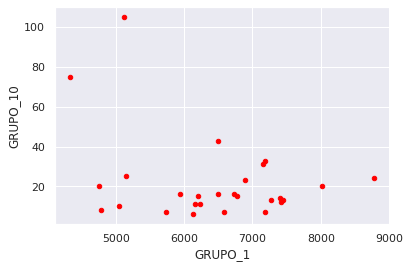

In [103]:
datos.plot(kind='scatter',x='GRUPO_1',y='GRUPO_10',color='red')
plt.show()

In [125]:
datos['SUMA_GRUPOS'] = datos['GRUPO_1'] + datos['GRUPO_2'] + datos['GRUPO_3'] + datos['GRUPO_4'] + datos['GRUPO_5'] + datos['GRUPO_6'] + datos['GRUPO_7'] + datos['GRUPO_8'] + datos['GRUPO_9'] + datos['GRUPO_10']
datos[ datos['CAMPAÑA'] > 2020 ].CAMPAÑA = 2020
datos[ datos['CAMPAÑA'] > 202000 ]  # Primeras 5 campañas del 2020

,CAMPAÑA,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES,SUMA_GRUPOS
18,202001,6159,5611,3427,1348,210,151,39,15,23,11,48886,16994
19,202002,4786,4207,1534,549,148,126,31,9,10,8,47766,11408
20,202003,5935,4902,2390,481,133,146,31,19,8,16,51204,14061
21,202004,8017,6597,3923,1713,396,362,50,33,23,20,56072,21134
22,202005,8783,6322,4436,1909,1529,745,66,48,42,24,50980,23904
23,202006,5118,4371,3112,1106,788,1110,172,207,458,105,46800,16547
24,202007,4328,3192,2000,548,334,337,52,78,118,75,50352,11062
25,202008,5149,4501,3089,628,344,462,10,42,20,25,59159,14270
26,202009,7423,6990,4894,2013,530,657,50,118,27,12,66338,22714


<AxesSubplot:xlabel='SUMA_GRUPOS', ylabel='PEDIDOS_TOTALES'>

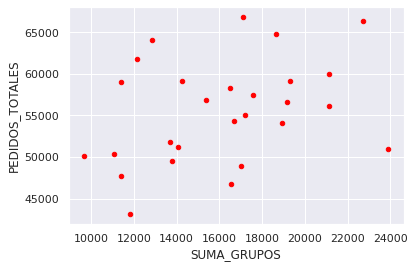

In [97]:
datos.plot(kind='scatter',x='SUMA_GRUPOS',y='PEDIDOS_TOTALES',color='red')